# Breast Cancer (Logistic Regression)

## Introduction

**Dataset**: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Breast cancer is unfortunately one of the most common types of cancer affecting women worldwide. It begins when cells in the breast grow uncontrollably, forming a tumor that can be *benign* (non-cancerous) or *malignant* (cancerous).

However, early detection of breast cancer greatly increases the chances of successful treatment and survival. Hence, machine learning models are being used to assist in diagnosing breast cancer by analyzing patterns in medical data, such as images or measurements from tumors.

In the dataset, features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [2]:
df = pd.read_csv("../data/breast-cancer-data.csv")

df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Checking for Missing Values and Duplicates

In [3]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

It appears as though our data does not contain any missing values, except for the column `Unnamed: 32`, which is full of missing values. We will go ahead and remove this column entirely.

In [4]:
df.drop(columns=["Unnamed: 32"], inplace=True)

In [5]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [6]:
df.duplicated().sum()

np.int64(0)

Thankfully, there are no duplicate rows.

## Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The `id` column is unimportant. As a result, it will be dropped.

In [8]:
df.drop(columns=["id"], inplace=True)

In [9]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

Our target variable, `diagnosis`, is categorical and has two classes, B (Benign) and M (Malignant). All features are numerical, so we can skip data type conversion. Let us take a closer look at our target.

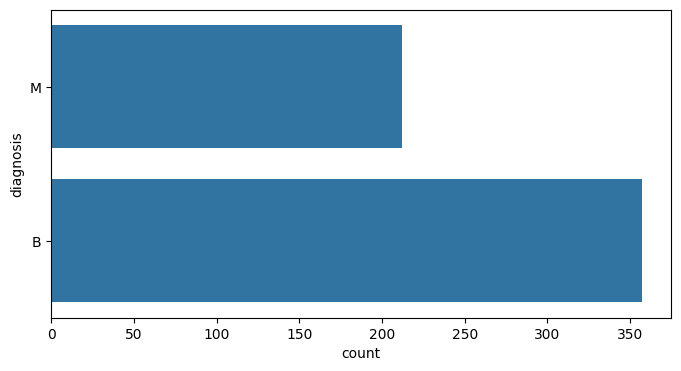

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(df["diagnosis"])

plt.show()

One of the assumptions of **Logistic Regression** is that, the features should be independent of each other i.e there is no correlation between our features. To check for this, we will create a correlation matrix.

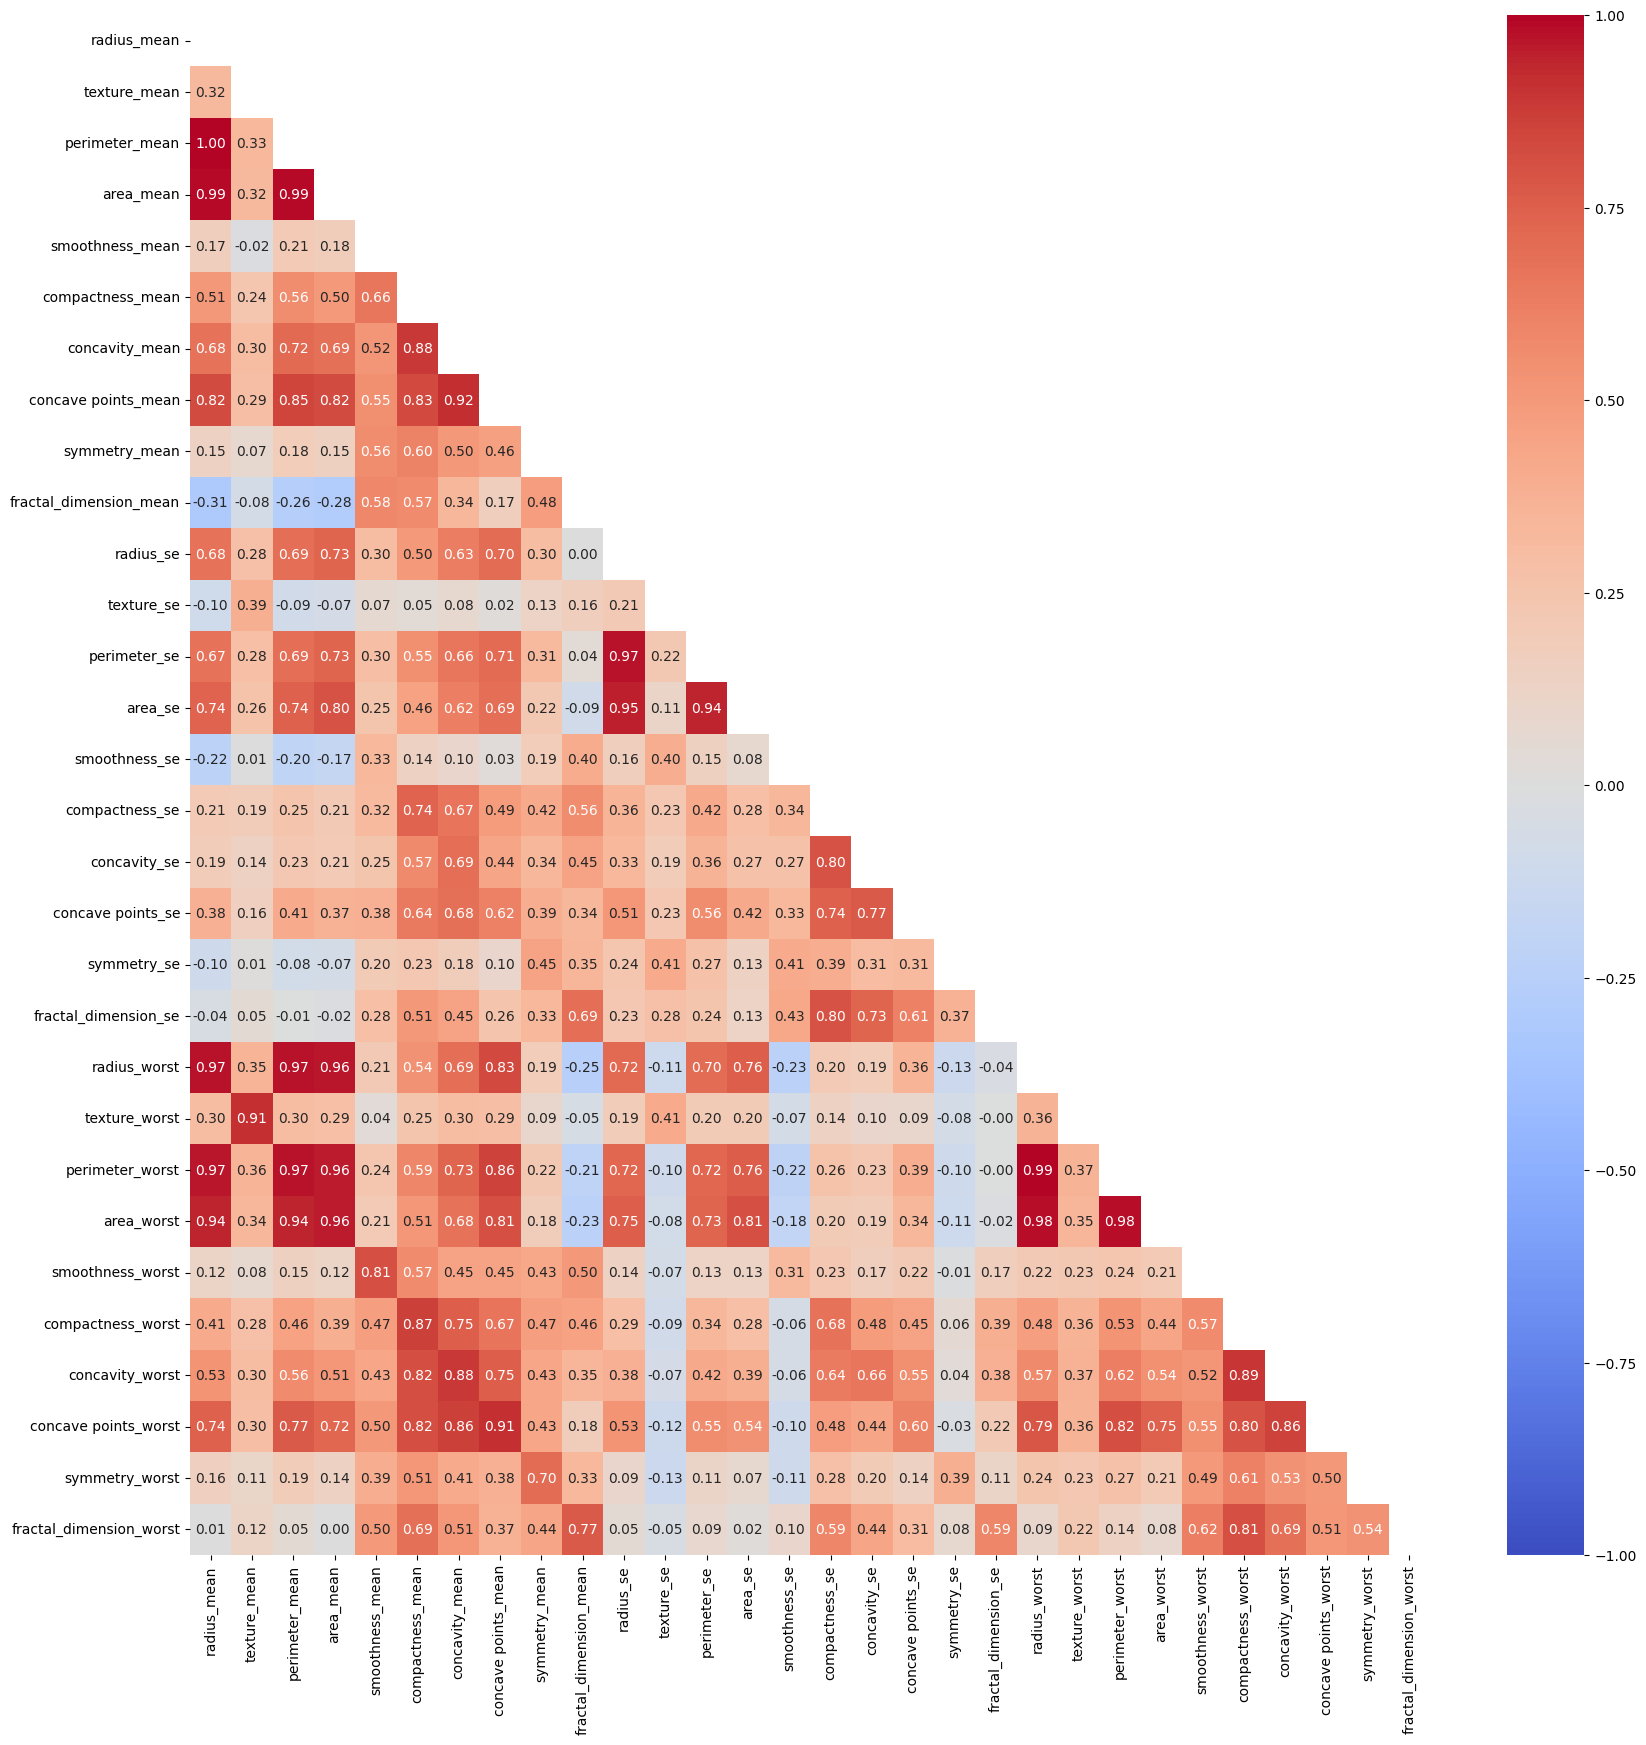

In [11]:
correlations = df.corr(numeric_only=True)

# Mask to cover the top half of the correlation matrix
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True, fmt=".2f", mask=mask, vmin=-1, vmax=1, center=0, cmap="coolwarm")
plt.show()

Looking at the matrix, we can immediately verify the presence of multicollinearity between some of our variables.

Multicollienartiy is apparent is between the "mean" columns and the "worst" column. For instance, the `radius_mean` column has a correlation of 0.97 with the `radius_worst` column. In fact, each of the 10 key attributes display very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns. This is somewhat inevitable, because the "worst" columns are essentially just a subset of the "mean" columns; the "worst" columns are also the "mean" of some values (the three largest values among all observations). Therefore, we could discard the "worst" columns from our analysis and only focus on the "mean" columns.

In [12]:
worst_cols = [
    'radius_worst', 
    'texture_worst', 
    'perimeter_worst', 
    'area_worst', 
    'smoothness_worst', 
    'compactness_worst', 
    'concavity_worst',
    'concave points_worst', 
    'symmetry_worst', 
    'fractal_dimension_worst'
]

df.drop(columns=worst_cols, inplace=True)

The `radius_mean` column has a correlation of 1 and 0.99 with `perimeter_mean` and `area_mean` columns, respectively. This is probably because the three columns essentially contain the same information, which is the physical size of the observation (the cell). Therefore we should only pick one of the three columns when we go into further analysis.

 If we think of a cell as roughly taking a form of a circle, then the formula for its perimeter is $2 \pi r$ and the formula for its area is $\pi r^2$. As we can see, a cell's radius is the basic building block of its size. Therefore, it is reasonable to choose radius as our attribute to represent the size of a cell.

In [13]:
perimeter_and_area_cols = [
    'perimeter_mean',
    'perimeter_se', 
    'area_mean', 
    'area_se'
]

df.drop(columns=perimeter_and_area_cols, inplace=True)

Similarly, it seems like there is multicollinearity between the attributes `compactness`, `concavity`, and `concave points`. Just like what we did with the size attributes, we should pick only one of these three attributes that contain information on the shape of the cell. We will pick `compactness`, since it is an attribute name that is straightforward, and remove the other two attributes.

In [14]:
concavity_cols = [
    'concavity_mean',
    'concavity_se', 
    'concave points_mean', 
    'concave points_se'
]

df.drop(columns=concavity_cols, inplace=True)

In [15]:
df.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0         M        17.99         10.38          0.11840           0.27760   
1         M        20.57         17.77          0.08474           0.07864   
2         M        19.69         21.25          0.10960           0.15990   
3         M        11.42         20.38          0.14250           0.28390   
4         M        20.29         14.34          0.10030           0.13280   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0         0.2419                 0.07871     1.0950      0.9053   
1         0.1812                 0.05667     0.5435      0.7339   
2         0.2069                 0.05999     0.7456      0.7869   
3         0.2597                 0.09744     0.4956      1.1560   
4         0.1809                 0.05883     0.7572      0.7813   

   smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
0       0.006399         0.04904      0.03003              0.006193  
1       0.005225         0.01308      0.01389              0.003532  
2       0.006150         0.04006      0.02250              0.004571  
3       0.009110         0.07458      0.05963              0.009208  
4       0.011490         0.02461      0.01756              0.005115

In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

We can take another look at our remaining columns.

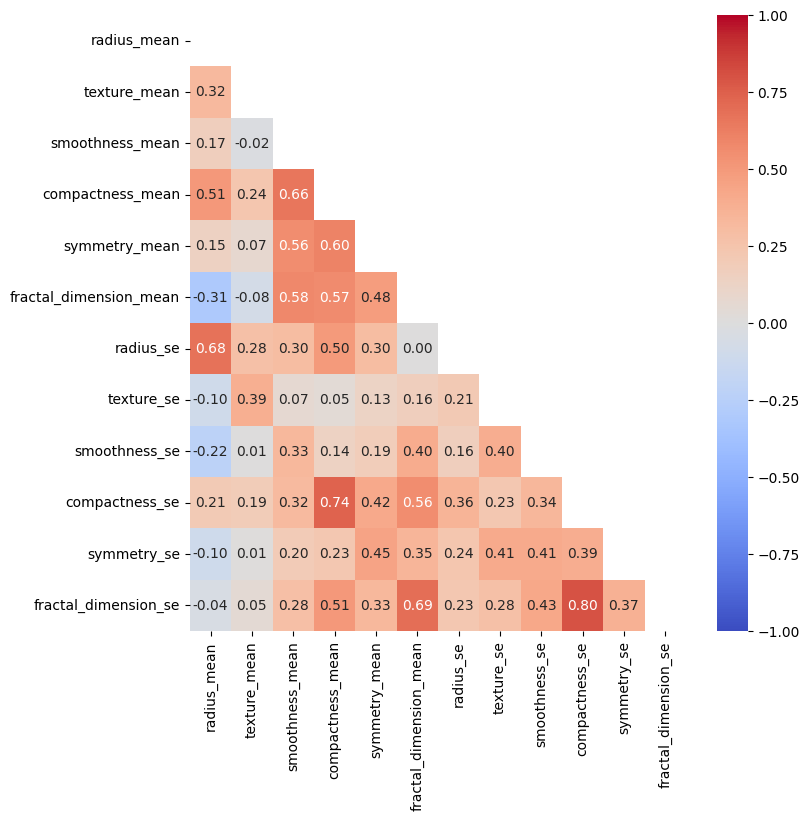

In [17]:
correlations = df.corr(numeric_only=True)

mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", mask=mask, vmin=-1, vmax=1, center=0, cmap="coolwarm")
plt.show()

Good enough for now. If you wish, you may continue feature selection as there are still some variables with high correlation between themselves.

We can further visualize the relationships between our variables using other charts like scatter plot.

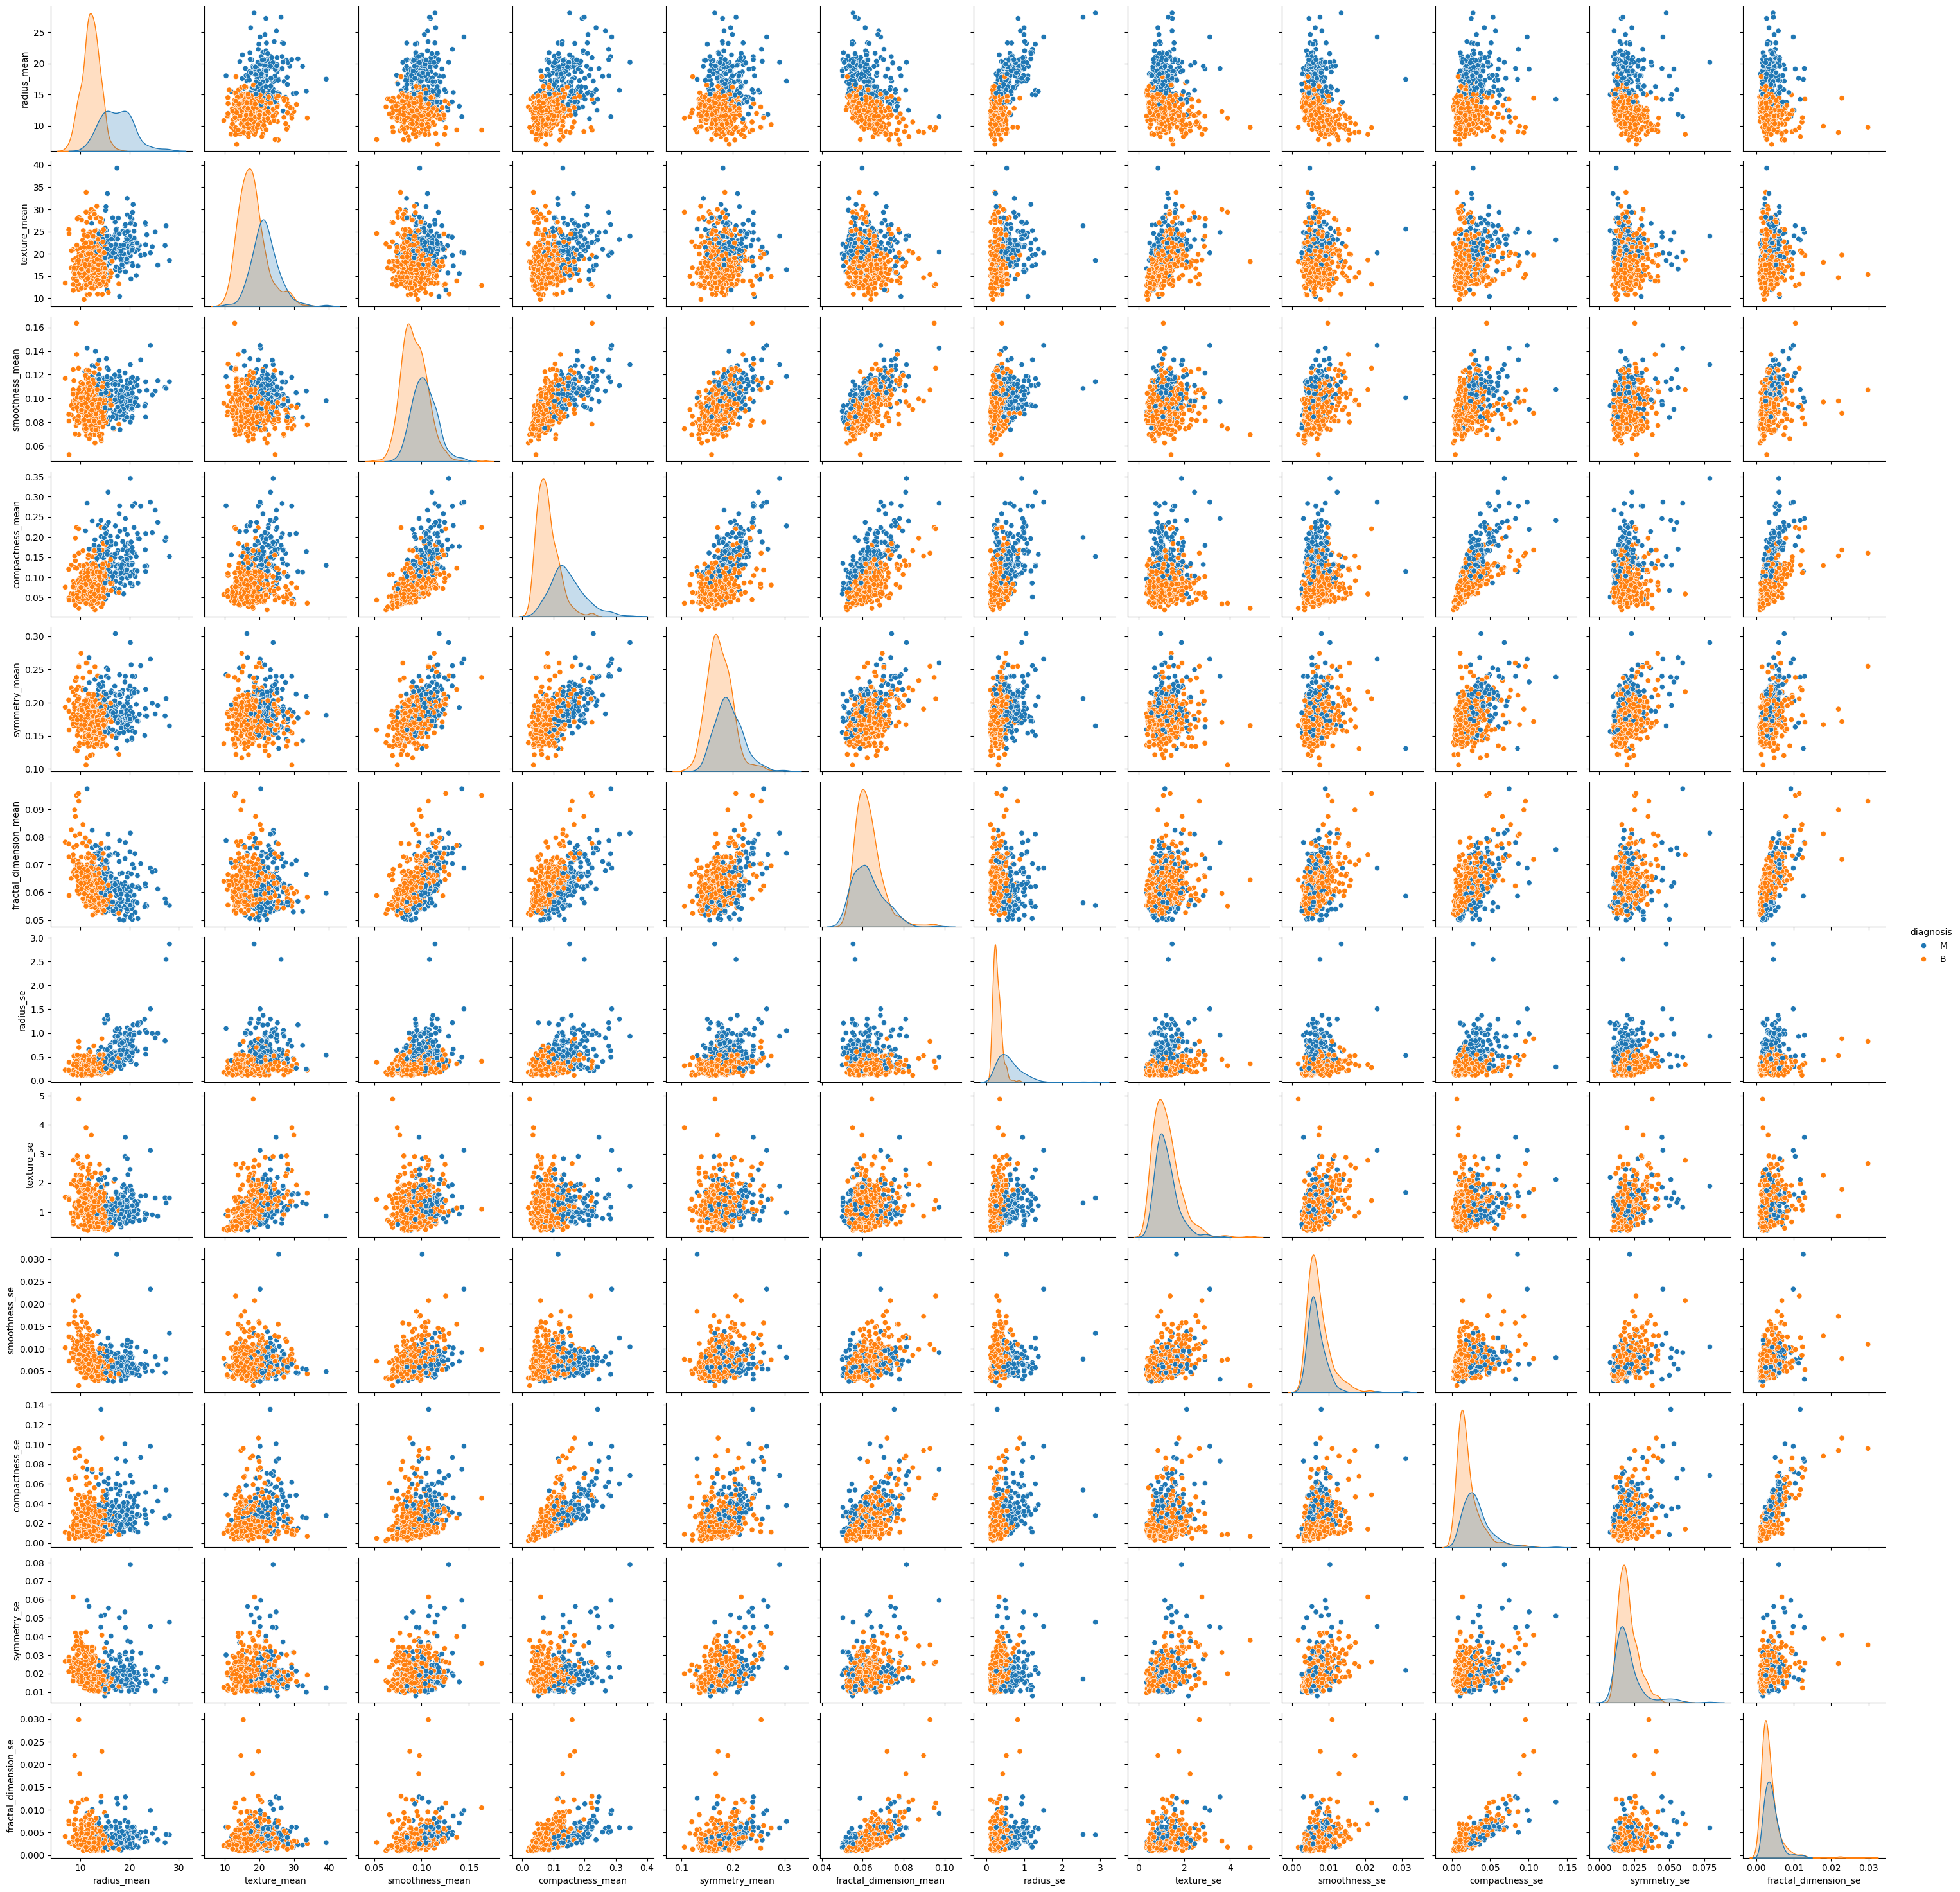

In [18]:
sns.pairplot(df, hue="diagnosis")
plt.show()

## Label Encoding Our Target Variable

As said earlier, our target variable is categorical. For this we will use `0` to represent benign and `1` to represent malignant.

In [19]:
df["diagnosis"] = df["diagnosis"].map({'M': 1, 'B': 0})

In [20]:
df.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          1        17.99         10.38          0.11840           0.27760   
1          1        20.57         17.77          0.08474           0.07864   
2          1        19.69         21.25          0.10960           0.15990   
3          1        11.42         20.38          0.14250           0.28390   
4          1        20.29         14.34          0.10030           0.13280   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0         0.2419                 0.07871     1.0950      0.9053   
1         0.1812                 0.05667     0.5435      0.7339   
2         0.2069                 0.05999     0.7456      0.7869   
3         0.2597                 0.09744     0.4956      1.1560   
4         0.1809                 0.05883     0.7572      0.7813   

   smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
0       0.006399         0.04904      0.03003              0.006193  
1       0.005225         0.01308      0.01389              0.003532  
2       0.006150         0.04006      0.02250              0.004571  
3       0.009110         0.07458      0.05963              0.009208  
4       0.011490         0.02461      0.01756              0.005115

## Getting our Features and Targets

Our target (dependent variable) is the `diagnosis` column. So everything else will be our features (independent variables).

In [21]:
X = df.drop(columns=["diagnosis"])
y = df[["diagnosis"]]

## Splitting into train and test sets

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Scaling Numerical Features

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the Model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

## Evaluation

As we are doing a medical diagnosis, false negatives are costly. Expecially for a cancer diagnosis. Because of this, we will use the recall score for evaluation.

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

y_pred = model.predict(X_test)

In [26]:
confusion_matrix(y_test, y_pred)

array([[68,  3],
       [ 2, 41]])

In [27]:
accuracy_score(y_test, y_pred)

0.956140350877193

In [28]:
recall_score(y_test, y_pred)

0.9534883720930233